In [2]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

import torch_harmonics as th
import torch

In [3]:
filename = "../data/Ytrain_1_3_small.h5"

h5 = h5py.File(filename, 'r')

X = h5.get('X')[:]
Y1 = h5.get('Y1')[:]  # can take Y1 to Y4
Y2 = h5.get('Y2')[:]
Y3 = h5.get('Y3')[:]
Y4 = h5.get('Y4')[:]

h5.close()

In [4]:
X.shape, Y1.shape, Y2.shape, Y3.shape, Y4.shape

((10000, 36),
 (10000, 180, 360),
 (10000, 36, 72),
 (10000, 7, 14),
 (10000, 1, 2))

(array([1.83748000e+05, 8.76169000e+05, 2.91815900e+07, 1.83620674e+08,
        3.60933841e+08, 6.55169990e+07, 7.68597500e+06, 9.71000000e+02,
        2.90000000e+01, 4.00000000e+00]),
 array([-7.80652332, -5.95931053, -4.11209774, -2.26488519, -0.41767254,
         1.42954016,  3.27675295,  5.12396574,  6.97117805,  8.81839085,
        10.66560364]),
 <BarContainer object of 10 artists>)

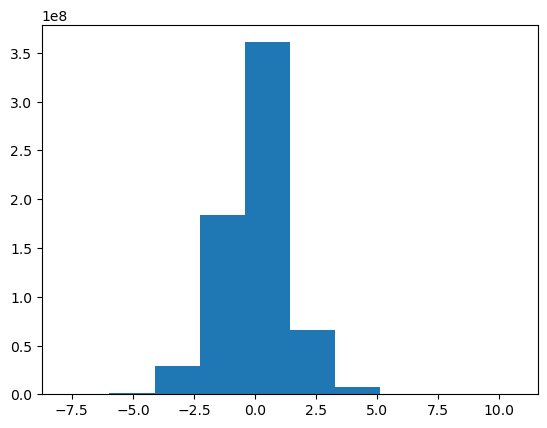

In [8]:
plt.hist(Y1.ravel())

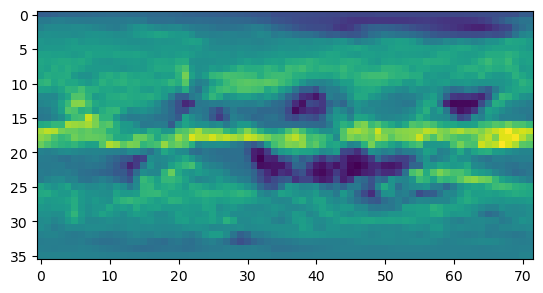

In [37]:
plt.imshow(Y2[69,:,:])

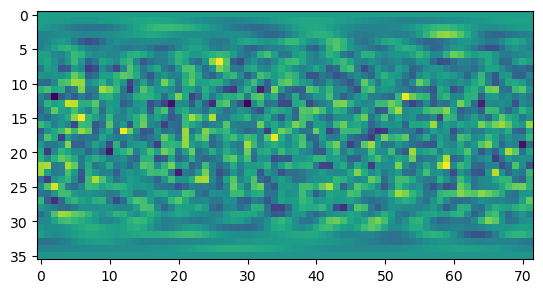

In [40]:
nlat = Y2.shape[1]
nlon = 2*nlat
batch_size = 2

signal = torch.randn(batch_size, nlat, nlon, dtype = torch.float64) 

sht = th.RealSHT(nlat, nlon, grid="equiangular")
isht = th.InverseRealSHT(nlat, nlon, grid = "equiangular")

plt.imshow(isht(sht(signal))[0])